# Polyp Detection on Colonoscopy Images using RetinaNet

## Load the Dataset

In [1]:
import os
import sys
import random

import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import skimage
from skimage.io import imread, imshow, imsave
from skimage.transform import resize
from skimage.color import *
from sklearn.model_selection import train_test_split
import cv2

import pandas as pd

In [2]:
dir_kvasir = r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG'

images_kvasir = sorted(glob(os.path.join(dir_kvasir, "images/*")))
masks_kvasir= sorted(glob(os.path.join(dir_kvasir, "masks/*")))

In [3]:
print('Total data from KVASIR ', len(images_kvasir))

Total data from KVASIR  1000


In [4]:
images_total_path = [*images_kvasir]
len(images_total_path)

1000

In [5]:
masks_total_path = [*masks_kvasir]
len(images_total_path)

1000

In [6]:
masks_total_path[1200:1205]

[]

In [7]:
images_total_path[610:617]

['C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\images\\cju5y7buemcw80987p0r30g9f.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\images\\cju5y84q3mdv50817eyp82xf3.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\images\\cju5yclrymlgj0818k426ud6z.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\images\\cju5yeqiwmkgl0801fzv2douc.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\images\\cju5ygh1zmmdi0755uod5e17i.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\images\\cju5yhgznmkzb0801cji2vi8j.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\images\\cju5yimthmlv80850zhoc90c2.jpg']

In [8]:
masks_total_path[610:617]

['C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\masks\\cju5y7buemcw80987p0r30g9f.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\masks\\cju5y84q3mdv50817eyp82xf3.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\masks\\cju5yclrymlgj0818k426ud6z.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\masks\\cju5yeqiwmkgl0801fzv2douc.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\masks\\cju5ygh1zmmdi0755uod5e17i.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\masks\\cju5yhgznmkzb0801cji2vi8j.jpg',
 'C:\\Users\\Asus\\Desktop\\PG Project\\Nandhini\\Phase 2\\Dataset\\Kvasir-SEG\\masks\\cju5yimthmlv80850zhoc90c2.jpg']

In [9]:
def create_data_list(img_path, mask_path, split=0.1):
    total_size = len(img_path)
    split_number = int(split*total_size)
    
    train_x, valid_x = train_test_split(img_path, test_size=split_number, random_state=31)
    train_y, valid_y = train_test_split(mask_path, test_size=split_number, random_state=31)
    
    train_x, test_x = train_test_split(train_x, test_size=split_number, random_state=31)
    train_y, test_y = train_test_split(train_y, test_size=split_number, random_state=31)
    
    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

In [10]:
def read_image(image_path, image_size): 
    x = imread(image_path)
    x = resize(x, (image_size, image_size))
    x = x[:, :,0:3]
    return x

def read_mask(mask_path, image_size):
    x = imread(mask_path, as_gray=True)
    x = resize(x, (image_size, image_size))
    x = np.expand_dims(x, axis=-1) 
    
    return x

In [11]:
def prepare_data(image_paths_list, mask_paths_list, image_size=512):
    images = np.ndarray((len(image_paths_list), image_size, image_size, 3)).astype('float32')
    labels = np.ndarray((len(image_paths_list), image_size, image_size, 1)).astype('float32')
    for i in range(len(image_paths_list)):
        images[i]=read_image(image_paths_list[i], image_size=image_size)
        labels[i]=read_mask(mask_paths_list[i], image_size=image_size)
    return images, labels

In [12]:
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = create_data_list(images_total_path, masks_total_path)
print(len(train_x))
print(len(valid_x))
print(len(test_x))

800
100
100


In [13]:
(train_images, train_labels) = prepare_data(train_x, train_y)
print("Training Images Shape :", train_images.shape)
print("Training Labels Shape :", train_labels.shape)

Training Images Shape : (800, 512, 512, 3)
Training Labels Shape : (800, 512, 512, 1)


In [14]:
(valid_images, valid_labels) = prepare_data(valid_x, valid_y)
print("Valid Images Shape :", valid_images.shape)
print("Valid Labels Shape :", valid_labels.shape)

Valid Images Shape : (100, 512, 512, 3)
Valid Labels Shape : (100, 512, 512, 1)


In [15]:
(test_images, test_labels) = prepare_data(test_x, test_y)
print("Test Images Shape :", test_images.shape)
print("Test Labels Shape :", test_labels.shape)

Test Images Shape : (100, 512, 512, 3)
Test Labels Shape : (100, 512, 512, 1)


In [16]:
train_labels[train_labels>=0.95]=1 ; train_labels[train_labels<0.95]=0
valid_labels[valid_labels>=0.95]=1 ; valid_labels[valid_labels<0.95]=0
test_labels[test_labels>=0.95]=1 ;test_labels[test_labels<0.95]=0

## Create Bounding Box from Mask

In [17]:
from skimage.measure import label, regionprops, find_contours

In [18]:
""" Convert a mask to border image """
def mask_to_border(mask):
    h, w = mask.shape
    border = np.zeros((h, w))
    contours = find_contours(mask, 0.5)
    for contour in contours:
        for c in contour:
            x = int(c[0])
            y = int(c[1])
            border[x][y] = 1
    return border
""" Mask to bounding boxes """
def mask_to_bbox(mask,dataframe,n):
    #for i in range(180):
    bboxes = []
    border = mask_to_border(mask[:,:,0])
    lbl = label(border)
    props = regionprops(lbl)
    for prop in props:
        x1 = prop.bbox[1]
        y1 = prop.bbox[0]
        x2 = prop.bbox[3]
        y2 = prop.bbox[2]
        new_row = {'img_path':i,'x1':x1, 'y1':y1, 'x2':x2, 'y2':y2, 'class_name':'polyp'}
        dataframe = dataframe.append(new_row, ignore_index=True)
        # bboxes.append([y1, x1, y2, x2])
    #bboxes=np.array(bboxes)
    return dataframe

In [20]:
df_train_label = pd.DataFrame(columns=['img_path', 'x1', 'y1', 'x2', 'y2', 'class_name'])
df_valid_label = pd.DataFrame(columns=['img_path', 'x1', 'y1', 'x2', 'y2', 'class_name' ])  
df_test_label = pd.DataFrame(columns=['img_path', 'x1', 'y1', 'x2', 'y2', 'class_name' ])  

In [21]:
df_test_label.head()

,img_path,x1,y1,x2,y2,class_name


In [22]:
for i in range(len(train_x)):
    df_train_label = mask_to_bbox(train_labels[i],df_train_label,i)  
for i in range(len(valid_x)):
    df_valid_label = mask_to_bbox(valid_labels[i],df_valid_label,i)    
for i in range(len(test_x)):
    df_test_label = mask_to_bbox(test_labels[i],df_test_label,i)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(new_row, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9164\221103176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(

In [23]:
df_test_label.head()

,img_path,x1,y1,x2,y2,class_name
0,0,216,32,359,228,polyp
1,1,40,92,322,413,polyp
2,2,149,187,266,300,polyp
3,3,152,164,471,483,polyp
4,4,19,174,270,420,polyp


In [24]:
df_valid_label.head()

,img_path,x1,y1,x2,y2,class_name
0,0,67,256,296,500,polyp
1,1,213,118,405,331,polyp
2,2,197,171,386,337,polyp
3,3,165,352,383,512,polyp
4,4,324,159,432,270,polyp


In [25]:
df_train_label.head()

,img_path,x1,y1,x2,y2,class_name
0,0,227,25,512,389,polyp
1,1,159,102,321,349,polyp
2,2,138,55,419,365,polyp
3,3,178,218,298,355,polyp
4,4,310,244,399,361,polyp


In [26]:
df_test_label.shape

(116, 6)

In [27]:
df_valid_label.shape

(105, 6)

In [28]:
df_train_label.shape

(889, 6)

## Visualize the Data

In [29]:
def visualize_overlay(img,mask,alpha,box):
    masked_img=img.astype(np.float64).copy()
    for c in range(3):
        masked_img[:,:,c]=np.where(mask[:,:,0]>=0.8,masked_img[:,:,c]*(1-alpha)+alpha*1,masked_img[:,:,c])
    f, ax = plt.subplots(1,3, figsize=(21,7)) 
    for i in range(len(box)):
        cv2.rectangle(masked_img, (box[i][0], box[i][1]), (box[i][2], box[i][3]), color=(0, 1, 0), thickness=2)
        cv2.putText(masked_img, str(box[i][4]), (box[i][0], box[i][1]-5), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,0),thickness=2)
    ax[0].set_title("Original Image")
    ax[0].imshow(img, cmap="gray")
    ax[1].imshow(mask, cmap="gray")
    ax[1].set_title("Ground Truth")
    ax[2].imshow(masked_img)
    ax[2].set_title("Overlay + bbox")

In [30]:
def search_bbox(index,df) :
    bbox=df[df['img_path'] == index]
    bbox=bbox.iloc[:, 1:6].to_numpy()
    return bbox

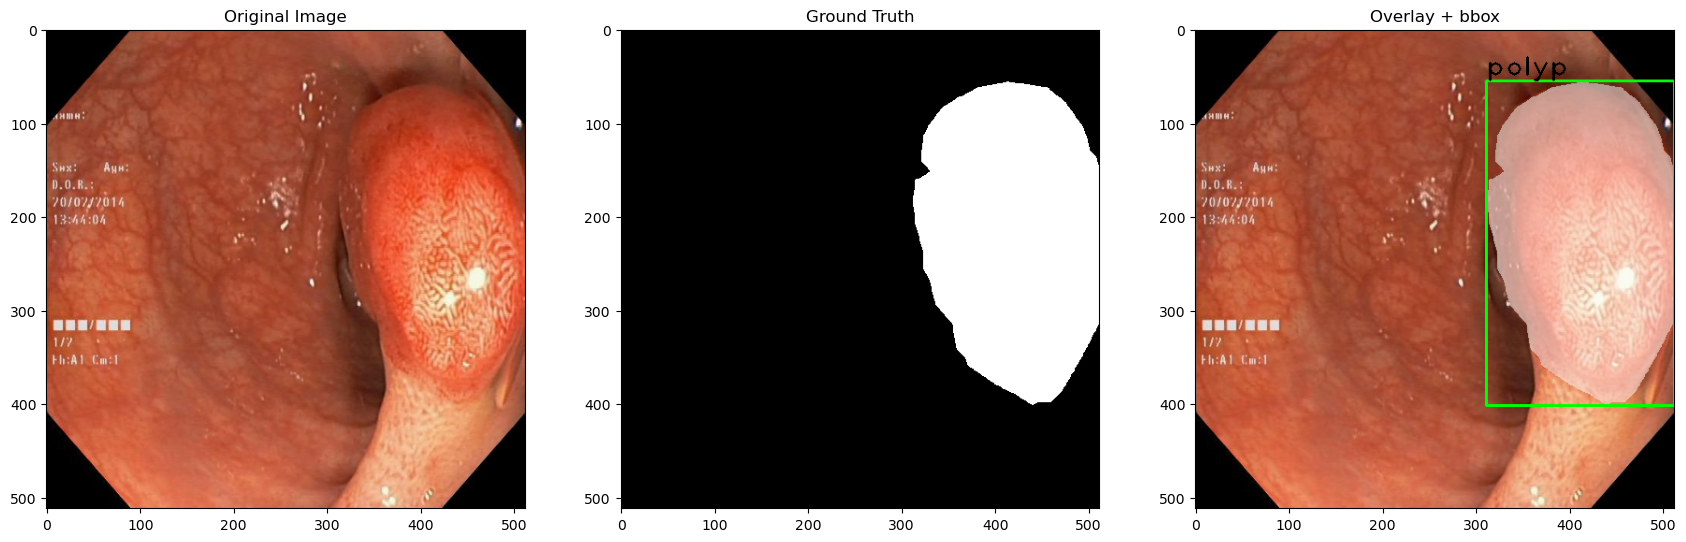

In [31]:
#change the index number from 0 to 799. because the train imaged in 800. for other images vary the index number
index = 799
box = search_bbox(index,df_train_label)
visualize_overlay(train_images[index],train_labels[index],0.5, box)
#plt.savefig(r"C:\Users\Asus\Desktop\image12.png", dpi=600)

In [32]:
print(box)

[[311 55 512 402 'polyp']]


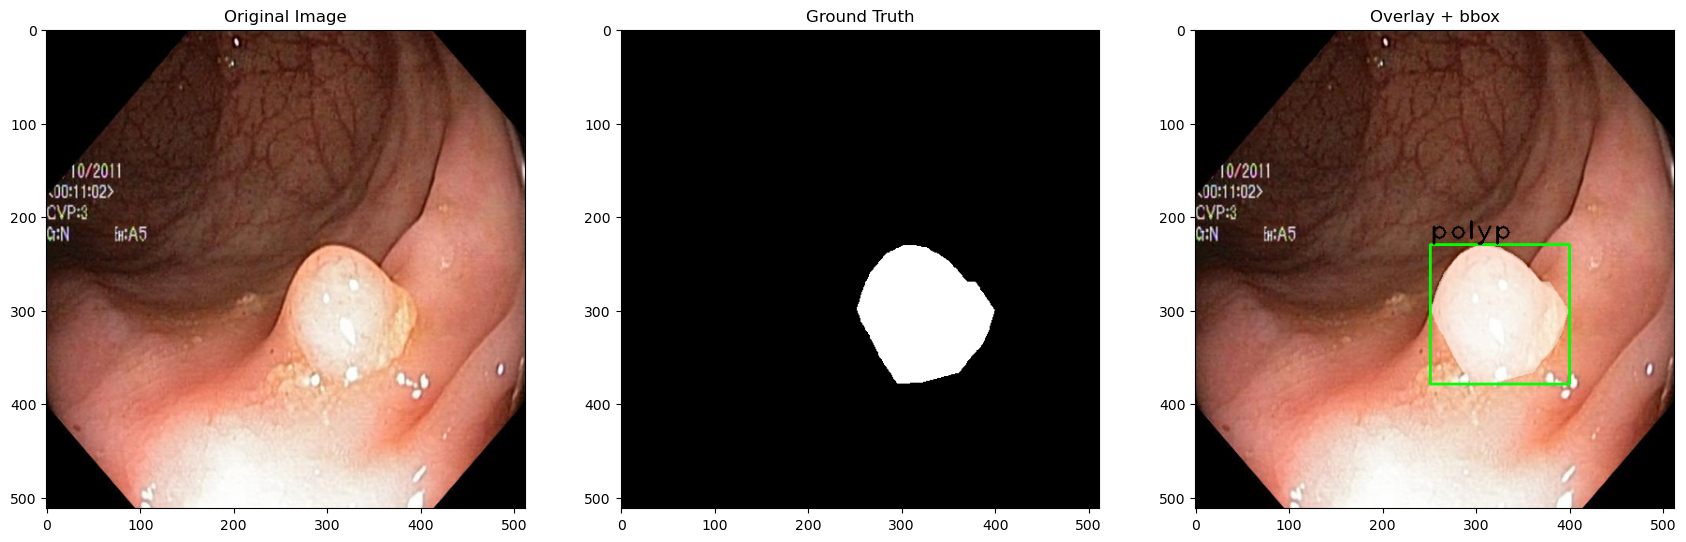

In [33]:
#change the index number from 0 to 799. because the train imaged in 800. for other images vary the index number
index = 450
box = search_bbox(index,df_train_label)
visualize_overlay(train_images[index],train_labels[index],0.5, box)
#plt.savefig(r"C:\Users\Asus\Desktop\image+mask.png", dpi=600)

In [34]:
print(box)

[[251 230 400 379 'polyp']]


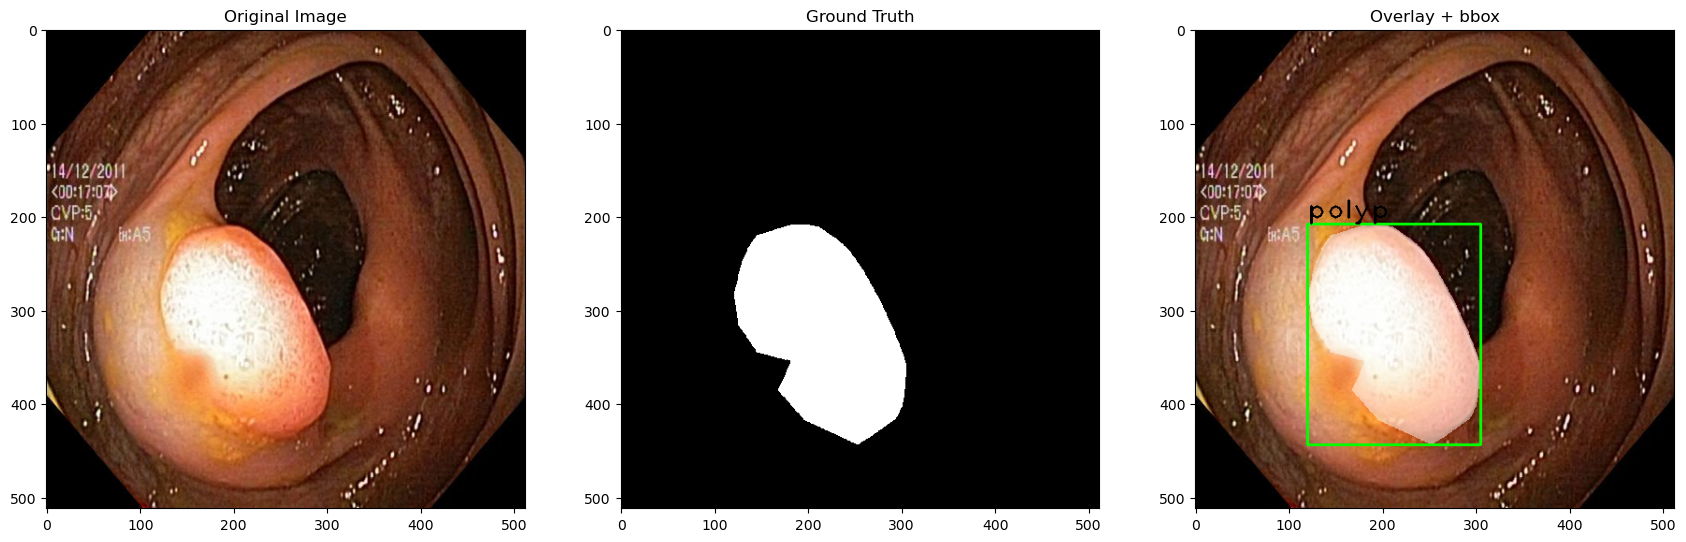

In [35]:
#change the index number from 0 to 799. because the train imaged in 800. for other images vary the index number
index = 7
box = search_bbox(index,df_test_label)
visualize_overlay(test_images[index],test_labels[index],0.5, box)
#plt.savefig(r"C:\Users\Asus\Desktop\image+mask1.png", dpi=600)

In [36]:
print(box)

[[120 208 305 444 'polyp']]


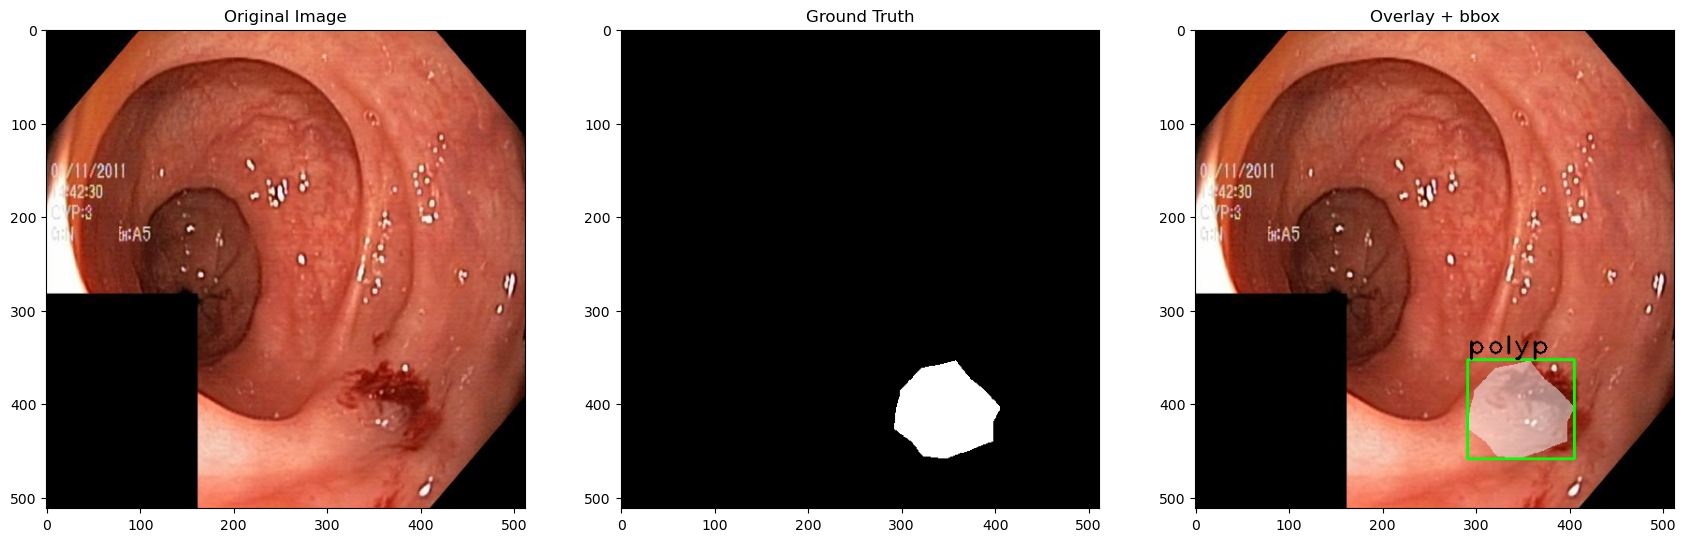

In [37]:
#change the index number from 0 to 799. because the train imaged in 800. for other images vary the index number
index = 40
box = search_bbox(index,df_valid_label)
visualize_overlay(valid_images[index],valid_labels[index],0.5, box)
#plt.savefig(r"C:\Users\Asus\Desktop\image+mask2.png", dpi=600)

In [38]:
print(box)

[[291 353 405 459 'polyp']]


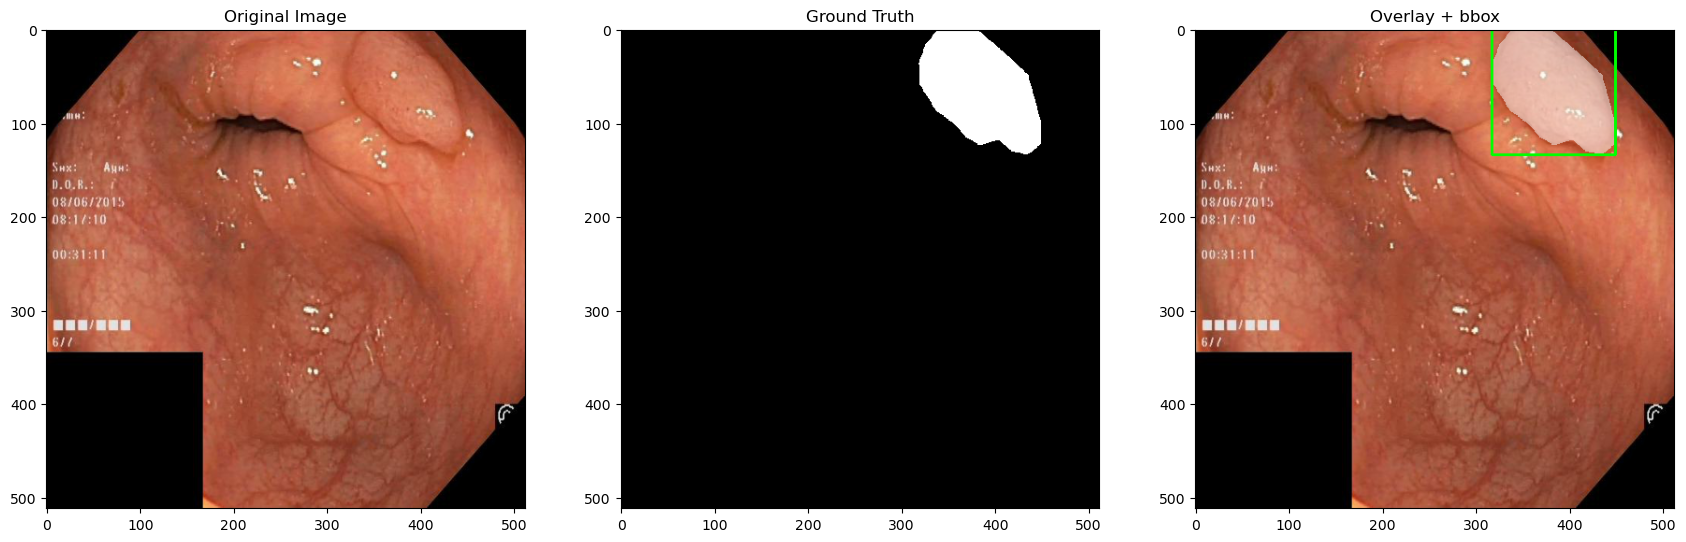

In [39]:
#change the index number from 0 to 799. because the train imaged in 800. for other images vary the index number
index = 50
box = search_bbox(index,df_test_label)
visualize_overlay(test_images[index],test_labels[index],0.5, box)
#plt.savefig(r"C:\Users\Asus\Desktop\image+mask3.png", dpi=600)

In [40]:
print(box)

[[317 0 449 134 'polyp']]


## Save image and DataFrame

In [41]:
from PIL import Image
for i in range(len(train_images)):
    rescaled = (train_images[i]*255).astype(np.uint8)
    Image.fromarray(rescaled,'RGB').save(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\train\train'+ str(i)+".png")
for i in range(len(valid_images)):
    rescaled = (valid_images[i]*255).astype(np.uint8)
    Image.fromarray(rescaled,'RGB').save(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\valid\valid'+ str(i)+".png")  
for i in range(len(test_images)):
    rescaled = (test_images[i]*255).astype(np.uint8)
    Image.fromarray(rescaled,'RGB').save(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test'+ str(i)+".png")   

In [42]:
df_train_label['img_path'] = r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\train\train'+  df_train_label['img_path'].astype(str) +".png" 
df_valid_label['img_path'] = r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\valid\valid' +   df_valid_label['img_path'].astype(str) +".png"
df_test_label['img_path'] = r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test'+ df_test_label['img_path'].astype(str) +".png"

In [43]:
df_train_label.head()

,img_path,x1,y1,x2,y2,class_name
0,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,227,25,512,389,polyp
1,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,159,102,321,349,polyp
2,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,138,55,419,365,polyp
3,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,178,218,298,355,polyp
4,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,310,244,399,361,polyp


In [44]:
df_valid_label.head()

,img_path,x1,y1,x2,y2,class_name
0,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,67,256,296,500,polyp
1,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,213,118,405,331,polyp
2,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,197,171,386,337,polyp
3,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,165,352,383,512,polyp
4,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,324,159,432,270,polyp


In [45]:
df_test_label.head()

,img_path,x1,y1,x2,y2,class_name
0,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,216,32,359,228,polyp
1,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,40,92,322,413,polyp
2,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,149,187,266,300,polyp
3,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,152,164,471,483,polyp
4,C:\Users\Asus\Desktop\PG Project\Nandhini\Phas...,19,174,270,420,polyp


In [46]:
df_train_label.to_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\train.csv', index=False, header=None)
df_valid_label.to_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\valid.csv', index=False, header=None)
df_test_label.to_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test.csv', index=False, header=None)

In [47]:
class_name = {'class': ['polyp'],'id': [0]}

In [48]:
df_class = pd.DataFrame(class_name)
df_class.to_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\class.csv', index=False, header=None)